# Final Project

**Задание**:

Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

**Целевая переменная**:

Price

**Описание датасета**:

* **Id** - идентификационный номер квартиры

* **DistrictId** - идентификационный номер района

* **Rooms** - количество комнат

* **Square** - площадь

* **LifeSquare** - жилая площадь

* **KitchenSquare** - площадь кухни

* **Floor** - этаж

* **HouseFloor** - количество этажей в доме

* **HouseYear** - год постройки дома

* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности

* **Social_1, Social_2, Social_3** - социальные показатели местности

* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья

* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров

* **Price** - цена квартиры

In [226]:
import numpy as np
import pandas as pd

In [227]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [228]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

In [229]:
DATASET_PATH = '../Final_Project/train.csv'
DATASET_PATH_1 = '../Final_Project/test.csv'

In [230]:
df_train = pd.read_csv(DATASET_PATH, index_col='Id')
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [231]:
df_train.shape

(10000, 19)

In [232]:
df_test = pd.read_csv(DATASET_PATH_1, index_col='Id')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [233]:
df_test.shape

(5000, 18)

## Предобработка данных

In [234]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [235]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

### Обработка выбросов

In [236]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [237]:
# Разделение признаков на числовые и строковые
feat_num = list(df_train.select_dtypes(exclude='object').columns)
feat_obj = list(df_train.select_dtypes(include='object').columns)
target = 'Price'

In [238]:
feat_num

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price']

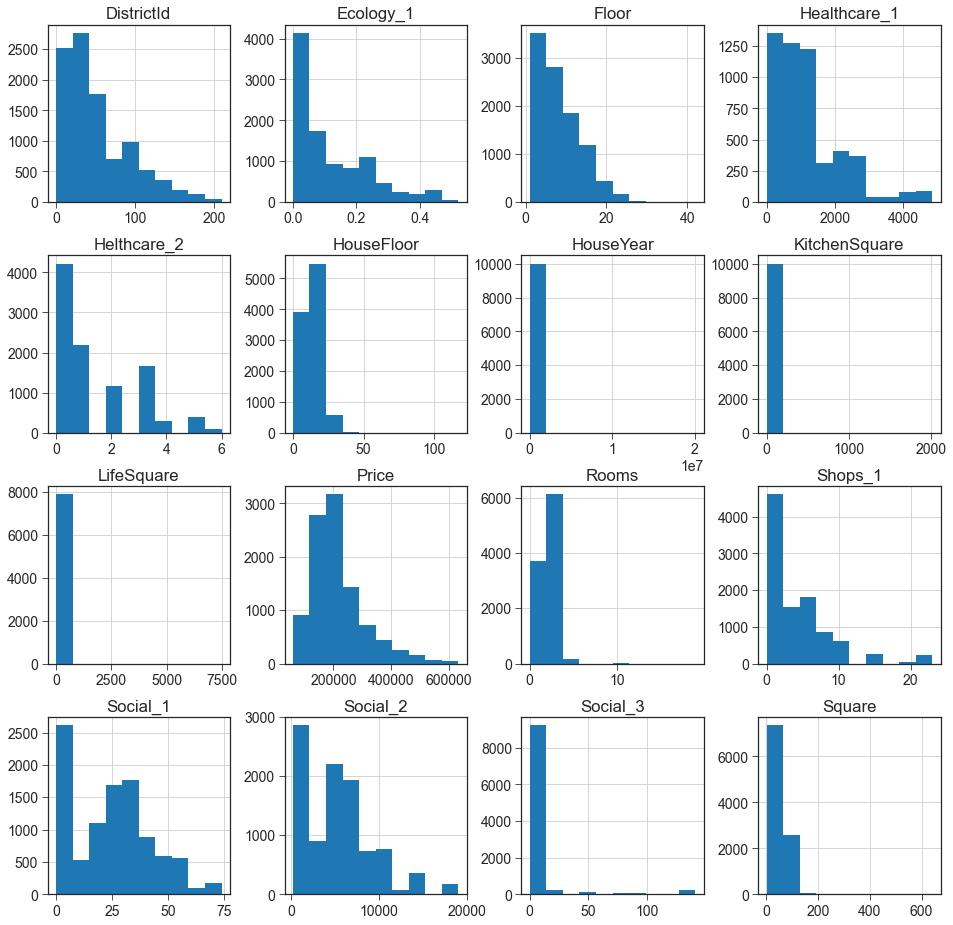

In [239]:
df_train[feat_num].hist(figsize=(16,16))
         
plt.show()

#### Rooms

In [240]:
df_train['Rooms'].value_counts()
# Выбросы  - 0, 10, 19

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [241]:
# Заменяем выбросы на медианное значение в обоих датасетах

df_train.loc[(df_train['Rooms'] > 5)|(df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()

df_test.loc[(df_test['Rooms'] > 5)|(df_test['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()

In [242]:
df_train['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

#### Square

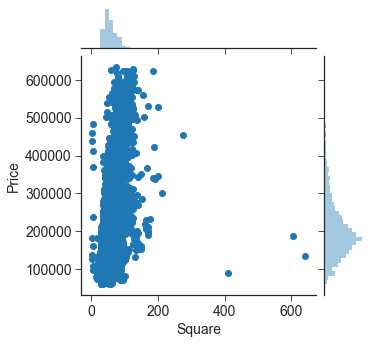

In [243]:
sns.jointplot(df_train['Square'], df_train['Price'], kind='scatter', height=5);

In [244]:
df_train.loc[df_train['Square'] > 275]

# Выбросы: > 275

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [245]:
# Заменяем выбросы на медианное значение в обоих датасетах

df_train.loc[(df_train['Square'] > 275), 'Square'] = df_train['Square'].median()

df_test.loc[(df_test['Square'] > 275), 'Square'] = df_train['Square'].median()

#### LifeSquare

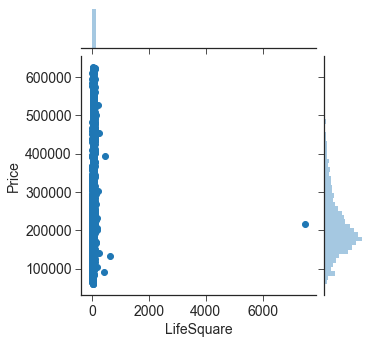

In [246]:
sns.jointplot(df_train['LifeSquare'], df_train['Price'], kind='scatter', height=5);

In [247]:
df_train.loc[df_train['LifeSquare'] > 200]
# Выбросы: > 200

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
7917,27,2.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
5548,86,5.0,52.513310,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
2307,102,1.0,52.513310,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
11602,30,2.0,52.513310,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [248]:
# Заменяем выбросы на медианное значение в обоих датасетах

df_train.loc[(df_train['LifeSquare'] > 200), 'LifeSquare'] = df_train['LifeSquare'].median()

df_test.loc[(df_test['LifeSquare'] > 200), 'LifeSquare'] = df_train['LifeSquare'].median()

#### KitchenSquare

In [249]:
df_train['KitchenSquare'].value_counts().sort_values()

# Выбросы  - 0, 1970, 2014

54.0         1
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
42.0         1
62.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
63.0         1
53.0         1
30.0         2
58.0         2
32.0         2
51.0         2
43.0         2
25.0         2
112.0        2
41.0         2
37.0         2
22.0         3
2.0          4
18.0         6
19.0        11
17.0        12
20.0        14
16.0        16
3.0         22
15.0        31
4.0         39
14.0        51
13.0        67
11.0       233
12.0       249
7.0        609
0.0        697
9.0        843
6.0       1038
10.0      1075
5.0       1169
8.0       1306
1.0       2460
Name: KitchenSquare, dtype: int64

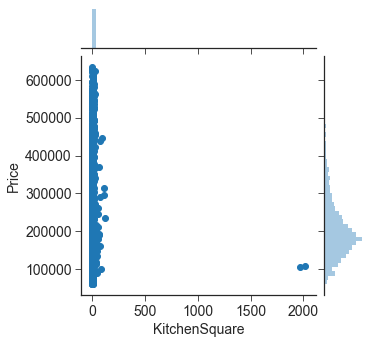

In [250]:
sns.jointplot(df_train['KitchenSquare'], df_train['Price'], kind='scatter', height=5);

In [251]:
# Заменяем выбросы на медианное значение в обоих датасетах

df_train.loc[(df_train['KitchenSquare'] > 150)|(df_train['KitchenSquare'] == 0), 'KitchenSquare'] = \
    df_train['KitchenSquare'].median()

df_test.loc[(df_test['KitchenSquare'] > 150)|(df_test['KitchenSquare'] == 0), 'KitchenSquare'] = \
    df_train['KitchenSquare'].median()

#### Проверяем отношение KitchenSquare и LifeSquare к общей площади Square

In [252]:
# Проверка тех значений Square, которые меньше суммарной площади LifeSquare и KitchenSquare
#df_train.loc[(df_train['Square'] < df_train['LifeSquare'] + df_train['KitchenSquare']), 'Square']

In [253]:
# Заменяем данные значения Square суммарными значениями LifeSquare + KitchenSquare
#df_train.loc[(df_train['Square'] < df_train['LifeSquare'] + df_train['KitchenSquare']), 'Square'] = \
#    df_train['LifeSquare'] + df_train['KitchenSquare']

#df_test.loc[(df_test['Square'] < df_test['LifeSquare'] + df_test['KitchenSquare']), 'Square'] = \
#    df_test['LifeSquare'] + df_test['KitchenSquare']

#### Floor, HouseFloor

In [254]:
df_train['Floor'].value_counts().sort_values()

31      1
33      1
42      1
37      1
32      2
28      3
27      5
26     18
23     25
25     34
24     53
22     54
21     59
20     68
19    121
18    185
1     235
17    256
15    287
16    290
14    362
13    398
12    438
11    457
10    553
2     588
9     604
8     643
7     759
6     802
3     872
5     876
4     949
Name: Floor, dtype: int64

In [255]:
df_train['Floor'].unique().max()
# максимальный этаж - 42

42

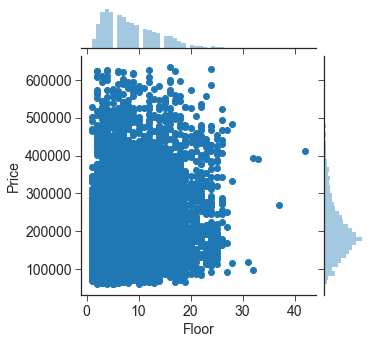

In [256]:
sns.jointplot(df_train['Floor'], df_train['Price'], kind='scatter', height=5);

In [257]:
df_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

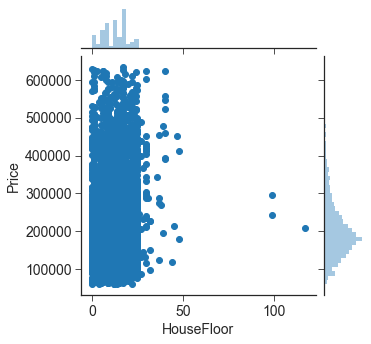

In [258]:
sns.jointplot(df_train['HouseFloor'], df_train['Price'], kind='scatter', height=5);

In [259]:
df_train.loc[(df_train['HouseFloor'] > 48)]
# Выбросы: 99, 117, а также 0

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [260]:
# Заменяем выбросы и нулевые значения HouseFloor на медианные значения

df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

df_train.loc[df_train['HouseFloor'] > 48, 'HouseFloor'] = df_train['HouseFloor'].median()
df_test.loc[df_test['HouseFloor'] > 48, 'HouseFloor'] = df_train['HouseFloor'].median()

In [261]:
df_train.loc[(df_train['HouseFloor'] > 48)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


In [262]:
# Проверяем значения Floor, которые больше чем количество этажей в доме HouseFloor

df_train[df_train['Floor'] > df_train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.0,80.312926,NaN,6.0,14,13.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
4378,27,3.0,106.958871,0.641822,6.0,17,13.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237


In [263]:
# Для таких наблюдений меняем значения Floor и HouseFloor местами

s = df_train['Floor'] > df_train['HouseFloor']

df_train.loc[s, ['Floor','HouseFloor']] = df_train.loc[s, ['HouseFloor','Floor']].values


k = df_test['Floor'] > df_test['HouseFloor']

df_test.loc[k, ['Floor','HouseFloor']] = df_test.loc[k, ['HouseFloor','Floor']].values

In [264]:
df_train[df_train['Floor'] > df_train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


#### HouseYear

In [265]:
df_train.loc[df_train['HouseYear'] > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [266]:
# Заменяем года более 2020 на медианное значение

df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = df_train['HouseYear'].median()

df_test.loc[df_test['HouseYear'] > 2020, 'HouseYear'] = df_test['HouseYear'].median()

In [267]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.888400,56.143696,35.977512,6.294300,7.918200,13.540000,1984.863800,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.811056,19.023477,17.477543,4.918303,5.186386,5.781292,18.409979,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.000000,1.136859,0.370619,1.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,4.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513040,32.781260,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.889256,45.086467,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,5.000000,212.932361,174.837082,123.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Обработка категориальных признаков

In [268]:
df_train.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [269]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [270]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [271]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [272]:
feat_obj

['Ecology_2', 'Ecology_3', 'Shops_2']

In [273]:
# Т.к. признаки принимают только 2 значения, можно не создавать dummy-перменные, а просто преобразовать

df_train[feat_obj] = df_train[feat_obj].replace({'A':0, 'B':1})
df_test[feat_obj] = df_test[feat_obj].replace({'A':0, 'B':1})

### Обработка пропусков

In [274]:
df_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [275]:
round(df_train.isna().sum() * 100 / df_train.shape[0], 1)

DistrictId        0.0
Rooms             0.0
Square            0.0
LifeSquare       21.1
KitchenSquare     0.0
Floor             0.0
HouseFloor        0.0
HouseYear         0.0
Ecology_1         0.0
Ecology_2         0.0
Ecology_3         0.0
Social_1          0.0
Social_2          0.0
Social_3          0.0
Healthcare_1     48.0
Helthcare_2       0.0
Shops_1           0.0
Shops_2           0.0
Price             0.0
dtype: float64

In [276]:
df_train.corr()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
DistrictId,1.000000,0.075724,-0.028434,-0.063042,0.156146,-0.091667,-0.216469,-0.201194,0.065294,-0.093406,-0.027902,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,-0.021018,0.265100
Rooms,0.075724,1.000000,0.760032,0.600686,0.106213,-0.007187,-0.041130,-0.043590,-0.030731,-0.002296,-0.006552,0.076405,0.071335,0.014031,0.045060,0.063121,0.053238,-0.000928,0.571638
Square,-0.028434,0.760032,1.000000,0.749638,0.135471,0.089791,0.144007,0.189800,-0.071643,0.032233,0.030834,-0.078394,-0.048556,0.022916,-0.047353,-0.033651,0.010333,-0.057376,0.578680
LifeSquare,-0.063042,0.600686,0.749638,1.000000,0.073981,0.089063,0.114864,0.185270,-0.065319,0.026038,0.037087,-0.153235,-0.118594,0.055488,-0.045473,-0.071897,-0.001711,-0.042261,0.399836
KitchenSquare,0.156146,0.106213,0.135471,0.073981,1.000000,0.076398,0.063897,0.164087,0.019945,0.000736,-0.045267,0.218772,0.202549,-0.077882,0.082751,0.113607,0.040079,-0.012948,0.230765
Floor,-0.091667,-0.007187,0.089791,0.089063,0.076398,1.000000,0.605752,0.261898,-0.000844,0.043295,0.013265,-0.024155,-0.003426,-0.006036,-0.112747,-0.046460,0.018135,0.010198,0.112649
HouseFloor,-0.216469,-0.041130,0.144007,0.114864,0.063897,0.605752,1.000000,0.467430,-0.034155,0.081254,0.031680,-0.093019,-0.048195,-0.025222,-0.191088,-0.132977,0.000187,-0.021031,0.111108
HouseYear,-0.201194,-0.043590,0.189800,0.185270,0.164087,0.261898,0.467430,1.000000,-0.066438,0.076806,0.047153,-0.047962,0.013622,-0.049389,-0.205125,-0.116430,-0.002162,-0.058865,0.036574
Ecology_1,0.065294,-0.030731,-0.071643,-0.065319,0.019945,-0.000844,-0.034155,-0.066438,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,0.079809,-0.058381
Ecology_2,-0.093406,-0.002296,0.032233,0.026038,0.000736,0.043295,0.081254,0.076806,-0.110725,1.000000,-0.016643,-0.066017,-0.012709,0.008512,-0.031724,-0.082667,0.051892,0.022242,0.022379


In [277]:
df_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
DistrictId,1.00,0.08,-0.03,-0.06,0.16,-0.09,-0.22,-0.20,0.07,-0.09,-0.03,0.25,0.17,0.14,0.30,0.31,0.17,-0.02,0.27
Rooms,0.08,1.00,0.76,0.60,0.11,-0.01,-0.04,-0.04,-0.03,-0.00,-0.01,0.08,0.07,0.01,0.05,0.06,0.05,-0.00,0.57
Square,-0.03,0.76,1.00,0.75,0.14,0.09,0.14,0.19,-0.07,0.03,0.03,-0.08,-0.05,0.02,-0.05,-0.03,0.01,-0.06,0.58
LifeSquare,-0.06,0.60,0.75,1.00,0.07,0.09,0.11,0.19,-0.07,0.03,0.04,-0.15,-0.12,0.06,-0.05,-0.07,-0.00,-0.04,0.40
KitchenSquare,0.16,0.11,0.14,0.07,1.00,0.08,0.06,0.16,0.02,0.00,-0.05,0.22,0.20,-0.08,0.08,0.11,0.04,-0.01,0.23
Floor,-0.09,-0.01,0.09,0.09,0.08,1.00,0.61,0.26,-0.00,0.04,0.01,-0.02,-0.00,-0.01,-0.11,-0.05,0.02,0.01,0.11
HouseFloor,-0.22,-0.04,0.14,0.11,0.06,0.61,1.00,0.47,-0.03,0.08,0.03,-0.09,-0.05,-0.03,-0.19,-0.13,0.00,-0.02,0.11
HouseYear,-0.20,-0.04,0.19,0.19,0.16,0.26,0.47,1.00,-0.07,0.08,0.05,-0.05,0.01,-0.05,-0.21,-0.12,-0.00,-0.06,0.04
Ecology_1,0.07,-0.03,-0.07,-0.07,0.02,-0.00,-0.03,-0.07,1.00,-0.11,-0.22,0.03,0.01,-0.12,-0.04,0.03,-0.08,0.08,-0.06
Ecology_2,-0.09,-0.00,0.03,0.03,0.00,0.04,0.08,0.08,-0.11,1.00,-0.02,-0.07,-0.01,0.01,-0.03,-0.08,0.05,0.02,0.02


In [278]:
# Заполним отсутствуюющие значения LifeSquare значениями разницы между общей площадью Square и площадью кухни KitchenSquare

df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] = df_train['Square'] - df_train['KitchenSquare']

df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = df_test['Square'] - df_test['KitchenSquare']

In [279]:
# Признак Healthcare_1 содержит 48% пропусков. Можно было бы его удалить, но т.к. он хоть и незначительно, 
# но коррелирует с целевой переменной, попробуем заменить пропуски медианными значениями

df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

In [280]:
df_train.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [281]:
df_test.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

### Анализ целевой переменной

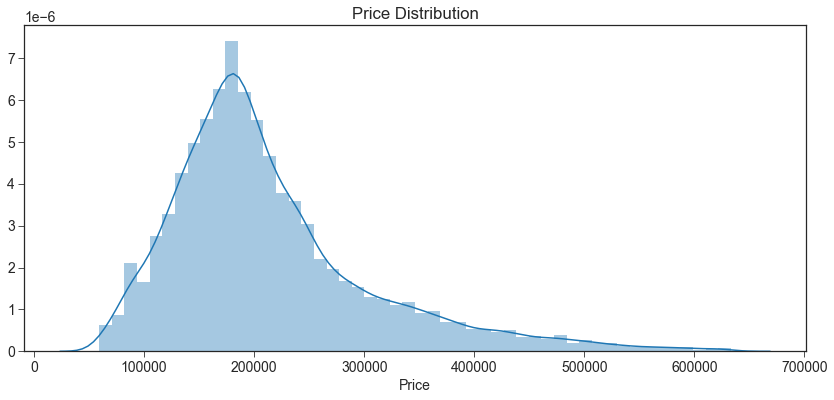

In [282]:
plt.figure(figsize = (14, 6))

sns.distplot(df_train['Price'])
plt.title('Price Distribution');

In [283]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()
target_mode = df_train['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

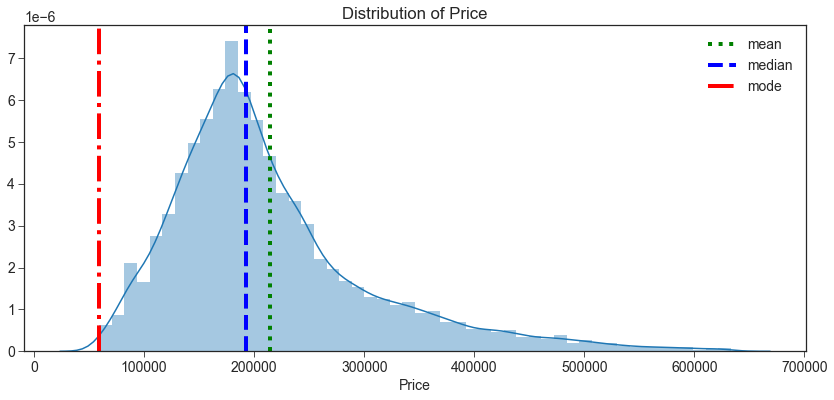

In [284]:
plt.figure(figsize = (14, 6))
sns.distplot(df_train['Price'])
plt.title('Distribution of Price')
plt.axvline(target_mean, color='g', label='mean', linestyle=':', linewidth=4)
plt.axvline(target_median, color='b', label='median', linestyle='--', linewidth=4)
plt.axvline(target_mode, color='r', label='mode', linestyle='-.', linewidth=4)
plt.legend();

### Добавление новых признаков

Стоимость квадратного метра

In [285]:
df_train['PriceMeter'] = df_train['Price'] / df_train['Square']

Размер районов

In [286]:
distr_info = df_train['DistrictId'].value_counts().reset_index().\
    rename(columns={"index": "DistrictId", "DistrictId": 'Big_District'})

df_train = pd.merge(df_train, distr_info, on='DistrictId', how='left')

df_train['Big_District'] = df_train['Big_District'].fillna(1)


In [287]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PriceMeter,Big_District
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,1,...,33,7976,5,900.0,0,11,1,184966.930730,3854.958571,22
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,1,...,46,10309,1,240.0,1,16,1,300009.450063,4567.491245,87
2,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968.0,0.049637,1,...,34,7759,0,229.0,1,3,1,220925.908524,4915.149522,174
3,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,1,...,23,5735,3,1084.0,0,5,1,175616.227217,3291.591637,179
4,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,1,...,35,5776,1,2078.0,2,4,1,150226.531644,3788.892642,97


In [288]:
distr_info_test = df_test['DistrictId'].value_counts().reset_index().\
    rename(columns={"index": "DistrictId", "DistrictId": 'Big_District'})

df_test = pd.merge(df_test, distr_info_test, on='DistrictId', how='left')

df_test['Big_District'] = df_test['Big_District'].fillna(1)


In [289]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Big_District
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,1,1,11,2748,1,900.0,0,0,1,91
1,74,2.0,69.263183,68.263183,1.0,1.0,6.0,1977.0,0.075779,1,1,6,1437,3,900.0,0,2,1,61
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909.0,0.000000,1,1,30,7538,87,4702.0,5,5,1,2
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,1,1,23,4583,3,900.0,3,3,1,49
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017.0,0.072158,1,1,2,629,1,900.0,0,0,0,391


### Стандартизация признаков

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error

In [291]:
X = df_train.drop(['Price'], axis=1)
y = df_train['Price']

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
X_train.shape, y_train.shape

((7500, 19), (7500,))

In [350]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6171 to 4061
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     7500 non-null   float64
 1   Rooms          7500 non-null   float64
 2   Square         7500 non-null   float64
 3   LifeSquare     7500 non-null   float64
 4   KitchenSquare  7500 non-null   float64
 5   Floor          7500 non-null   float64
 6   HouseFloor     7500 non-null   float64
 7   HouseYear      7500 non-null   float64
 8   Ecology_1      7500 non-null   float64
 9   Ecology_2      7500 non-null   float64
 10  Ecology_3      7500 non-null   float64
 11  Social_1       7500 non-null   float64
 12  Social_2       7500 non-null   float64
 13  Social_3       7500 non-null   float64
 14  Healthcare_1   7500 non-null   float64
 15  Helthcare_2    7500 non-null   float64
 16  Shops_1        7500 non-null   float64
 17  Shops_2        7500 non-null   float64
 18  Big_D

In [351]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

In [352]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,7500.0,3.922788e-17,1.000067,-1.150667,-0.698548,-0.372335,0.566241,3.633783
Rooms,7500.0,2.389200e-16,1.000067,-1.092552,-1.092552,0.139650,0.139650,3.836255
Square,7500.0,-1.909584e-17,1.000067,-2.916345,-0.756745,-0.188993,0.518391,8.345324
LifeSquare,7500.0,2.472097e-17,1.000067,-2.019654,-0.768517,-0.194450,0.456610,6.779428
KitchenSquare,7500.0,-8.934335e-17,1.000067,-1.055645,-0.654401,-0.052536,0.549329,23.420205
Floor,7500.0,1.134500e-16,1.000067,-1.331198,-0.751419,-0.171640,0.601398,6.592445
HouseFloor,7500.0,5.080381e-17,1.000067,-2.151727,-0.773416,0.088028,0.604895,5.945849
HouseYear,7500.0,2.186991e-16,1.000067,-4.027001,-0.630978,-0.415357,0.878366,1.902564
Ecology_1,7500.0,-1.010895e-16,1.000067,-0.995971,-0.847919,-0.363195,0.646558,3.382295
Ecology_2,7500.0,8.092416e-17,1.000067,-10.086611,0.099141,0.099141,0.099141,0.099141


In [353]:
def predictions(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )

### Linear Regression

In [354]:
X_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Big_District'],
      dtype='object')

In [355]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Big_District']

In [356]:
lr_model = LinearRegression()

In [357]:
lr_model.fit(X_train_scaled[feature_names], y_train)

LinearRegression()

In [358]:
y_train_preds = lr_model.predict(X_train_scaled[feature_names])
y_test_preds = lr_model.predict(X_test_scaled[feature_names])

predictions(y_train, y_train_preds, y_test, y_test_preds)

Train:	R2 = 0.577	MAE = 41107
Test:	R2 = 0.559	MAE = 42800


In [359]:
lr_model.coef_

array([  7967.34158533,  16614.81358943,  49639.37204888, -10468.26921026,
         2573.80597738,   1979.33122405,  14355.55009188,  -3044.62714791,
        -8388.91492689,   2897.00789514,  -2713.95699294,  10323.49170076,
        -5741.82640527,   1089.67093645,   4572.4768629 ,   6720.28609542,
        -6005.09507798,   4534.56696033, -27391.71649735])

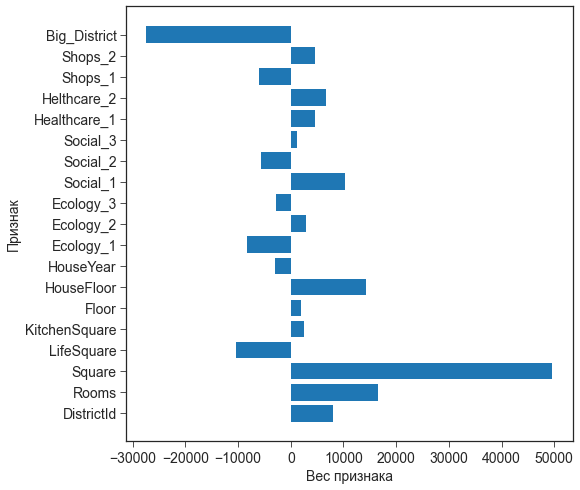

In [360]:
plt.barh(feature_names, lr_model.coef_.flatten())
plt.rcParams['figure.figsize'] = 8, 8
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Cross Validation

In [361]:
X = pd.concat([X_train_scaled[feature_names], X_test_scaled[feature_names]])
y = np.concatenate((y_train, y_test))
X.shape, y.shape

((10000, 19), (10000,))

In [362]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lr_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
scores

array([0.59317333, 0.55825156, 0.5791967 , 0.56252609, 0.55934318])

In [363]:
print('R2 для линейной регрессии = ', round(scores.mean(), 4))

R2 для линейной регрессии =  0.5705


### Random Forest

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7500, 19) (7500,)
(2500, 19) (2500,)


In [365]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train[feature_names], y_train)

RandomForestRegressor(random_state=42)

In [366]:
y_train_preds = rf_model.predict(X_train[feature_names])
y_test_preds = rf_model.predict(X_test[feature_names])

predictions(y_train, y_train_preds, y_test, y_test_preds)

Train:	R2 = 0.963	MAE = 10602
Test:	R2 = 0.757	MAE = 27013


In [367]:
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='r2', n_jobs=-1)

print('R2 для случайного леса = ', round(scores.mean(), 4))
print('Переобучение!')

R2 для случайного леса =  0.7388
Переобучение!


### Gradient Boosting

In [368]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train[feature_names], y_train)

GradientBoostingRegressor(random_state=42)

In [369]:
y_train_preds = gb_model.predict(X_train[feature_names])
y_test_preds = gb_model.predict(X_test[feature_names])

predictions(y_train, y_train_preds, y_test, y_test_preds)

Train:	R2 = 0.764	MAE = 28595
Test:	R2 = 0.737	MAE = 29690


#### Настройка Gradient Boosting

In [371]:
params = {'n_estimators':[100, 200], 
          'max_depth':[3, 5, 7]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=cv, n_jobs=-1)

gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='r2')

In [372]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [373]:
gs.best_score_ 

0.7503726928439652

In [374]:
gb_model_new = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
gb_model_new.fit(X_train[feature_names], y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [375]:
y_train_preds = gb_model_new.predict(X_train[feature_names])
y_test_preds = gb_model_new.predict(X_test[feature_names])

predictions(y_train, y_train_preds, y_test, y_test_preds)

Train:	R2 = 0.899	MAE = 19417
Test:	R2 = 0.761	MAE = 26741


In [376]:
scores = cross_val_score(gb_model_new, X, y, cv=cv, scoring='r2', n_jobs=-1)

print('R2 для градиентного бустинга = ', round(scores.mean(), 4))

R2 для градиентного бустинга =  0.7504


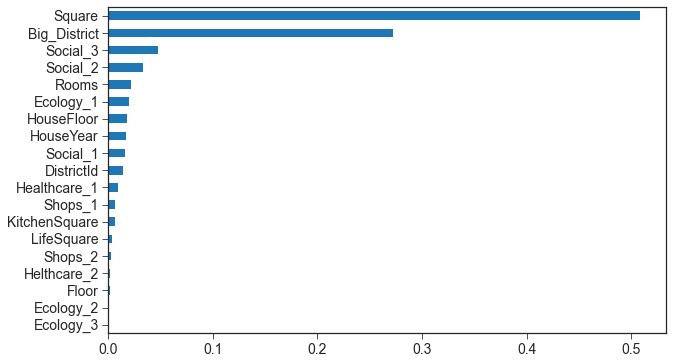

In [377]:
importances = gb_model.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 6));

### Кластеризация: k-means 

In [381]:
from sklearn.cluster import KMeans

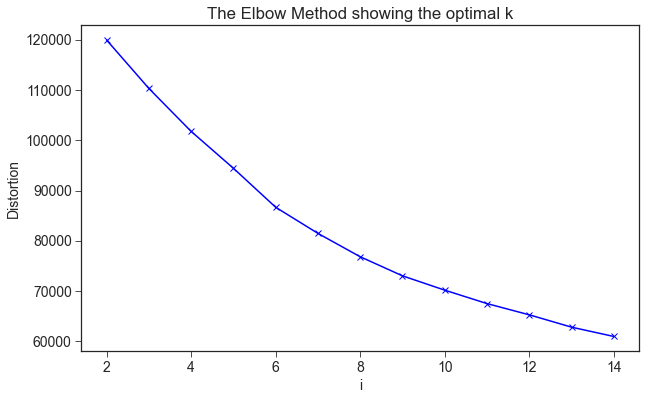

In [382]:
inertias = []

for i in range(2, 15):
    temp_model = KMeans(n_clusters=i, random_state=42)
    temp_model.fit(X_train_scaled)
    temp_inertia = temp_model.inertia_
    inertias.append(temp_inertia)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertias, 'bx-')
plt.xlabel('i')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k');

###### Выделение 6 кластеров

In [401]:
scaler = StandardScaler()

X_train_scaled_new = pd.DataFrame(scaler.fit_transform(X_train[feature_names]), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled_new = pd.DataFrame(scaler.transform(X_test[feature_names]), 
                        columns=X_test.columns, 
                        index=X_test.index)

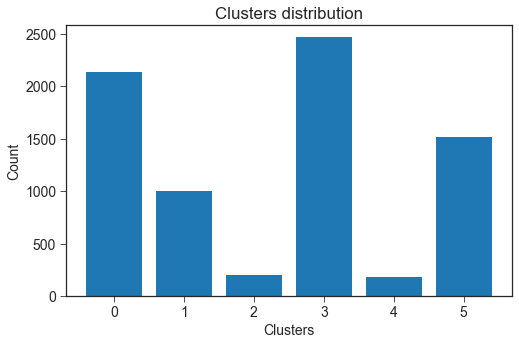

In [414]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_clast_6 = kmeans_6.fit_predict(X_train_scaled_new)
labels_clast_6 = pd.Series(labels_clast_6, name='clusters_6')

unique, counts = np.unique(labels_clast_6, return_counts=True)
plt.figure(figsize=(8,5))

plt.bar(unique, counts)

plt.xlabel('Clusters')
plt.xticks(unique)
plt.ylabel('Count')
plt.title('Clusters distribution');

In [426]:
clusters_6_dummies = pd.get_dummies(labels_clast_6, drop_first=True, prefix='clusters_6')

X_train_ext = pd.concat([X_train_scaled_new.reset_index(), 
                         clusters_6_dummies], axis=1)

X_train_ext.set_index('index', inplace=True)
X_train_scaled_new.shape, clusters_6_dummies.shape, X_train_ext.shape

((7500, 19), (2500, 5), (7500, 24))

In [416]:
X_train_ext.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Big_District,clusters_6_1,clusters_6_2,clusters_6_3,clusters_6_4,clusters_6_5
index,,,,,,,,,,,,,,,,,,,,,
5295,-0.909587,1.372136,0.607971,0.204175,0.151812,-0.185428,-0.271240,-0.535483,-1.000850,0.098453,...,-0.167846,-0.219823,-0.675154,0.3023,-0.414469,0,0,0,0,1
2069,0.342807,0.140416,-0.636126,-0.330002,-0.063016,-1.151872,-1.654884,-1.293313,-0.063276,0.098453,...,1.252883,0.446306,-0.261474,0.3023,-0.664283,1,0,0,0,0
1175,-0.955129,-1.091304,0.838537,-1.921661,-1.137160,-1.345161,-1.481929,-0.427221,0.356515,0.098453,...,-1.323018,0.446306,-0.054633,0.3023,0.200744,0,0,1,0,0
6512,0.024016,-1.091304,-0.986205,-0.962480,0.151812,1.360882,0.593537,1.196701,2.119799,0.098453,...,-0.367014,0.446306,0.152207,0.3023,-0.362269,0,0,1,0,0
3875,0.638827,-1.091304,-1.146843,-1.135647,-0.277845,-1.151872,-1.481929,-0.914398,1.584108,0.098453,...,-0.931322,0.446306,0.152207,0.3023,-0.738854,0,1,0,0,0


In [417]:
labels_clast_6 = kmeans_6.predict(X_test_scaled_new)

clusters_6_dummies = pd.get_dummies(labels_clast_6, drop_first=True, prefix='clusters_6')

X_test_ext = pd.concat([X_test_scaled_new.reset_index(), 
                        clusters_6_dummies], axis=1)

X_test_ext.set_index('index', inplace=True)
X_test_scaled_new.shape, clusters_6_dummies.shape, X_test_ext.shape

((2500, 19), (2500, 5), (2500, 24))

In [418]:
gb_model_clusters = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
gb_model_clusters.fit(X_train_ext, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [419]:
y_train_preds = gb_model_clusters.predict(X_train_ext)
y_test_preds = gb_model_clusters.predict(X_test_ext)

predictions(y_train, y_train_preds, y_test, y_test_preds)

#Train:	R2 = 0.899	MAE = 19417
#Test:	R2 = 0.761	MAE = 26741

Train:	R2 = 0.898	MAE = 19549
Test:	R2 = 0.766	MAE = 26839


In [420]:
scores = cross_val_score(gb_model_clusters, X, y, cv=cv, scoring='r2', n_jobs=-1)

print('R2 для градиентного бустинга с кластеризацией = ', round(scores.mean(), 4))

#R2 для градиентного бустинга =  0.7504

R2 для градиентного бустинга с кластеризацией =  0.7504


In [421]:
feature_importances = pd.DataFrame(zip(X_train_ext.columns, gb_model_clusters.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.365986
18,Big_District,0.191764
23,clusters_6_5,0.128492
13,Social_3,0.056531
8,Ecology_1,0.033180
7,HouseYear,0.029428
1,Rooms,0.028229
0,DistrictId,0.024810
3,LifeSquare,0.023625
6,HouseFloor,0.022372


#### Уточнение финальной модели

In [422]:
feature_new = ['Square',
               'Big_District',
               'clusters_6_5',
               'Social_3',
               'Ecology_1',
               'Social_2',
               'HouseYear',
               'DistrictId',
               'HouseFloor', 
               'LifeSquare',
               'Social_1', 
               'Rooms',    
               'KitchenSquare',
               'Healthcare_1'
]

In [423]:
gb_model_clusters = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
gb_model_clusters.fit(X_train_ext[feature_new], y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [424]:
y_train_preds = gb_model_clusters.predict(X_train_ext[feature_new])
y_test_preds = gb_model_clusters.predict(X_test_ext[feature_new])

predictions(y_train, y_train_preds, y_test, y_test_preds)


#Train:	R2 = 0.898	MAE = 19549
#Test:	R2 = 0.766	MAE = 26839

Train:	R2 = 0.898	MAE = 19567
Test:	R2 = 0.762	MAE = 26967


In [425]:
scores = cross_val_score(gb_model_clusters, X, y, cv=cv, scoring='r2', n_jobs=-1)

print('R2 для градиентного бустинга с кластеризацией = ', round(scores.mean(), 4))

#R2 для градиентного бустинга =  0.7504

R2 для градиентного бустинга с кластеризацией =  0.7504


### Выводы:
Наилучшие результаты дает Gradient Boosting: 

до кластеризации  R2 для test = 0.761, 

после кластеризации R2 для test = 0.766.

Уменьшение количества параметров ухудшает значение R2 для test до 0.762

### Прогнозирование для тестового датасета

In [427]:
df_test. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   float64
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   float64
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
 18  Big_Dist

In [441]:
scaler = StandardScaler()

df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test[feature_names]), 
                        columns=df_test.columns, 
                        index=df_test.index)


In [442]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_clast_6 = kmeans_6.fit_predict(df_test_scaled)
labels_clast_6 = pd.Series(labels_clast_6, name='clusters_6')

unique, counts = np.unique(labels_clast_6, return_counts=True)

In [446]:
clusters_6_dummies = pd.get_dummies(labels_clast_6, drop_first=True, prefix='clusters_6')

df_test_ext = pd.concat([df_test_scaled.reset_index(), 
                         clusters_6_dummies], axis=1)

df_test_ext.set_index('index', inplace=True)
df_test_scaled.shape, clusters_6_dummies.shape, df_test_ext.shape

((5000, 19), (5000, 5), (5000, 24))

In [447]:
df_test_ext.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Big_District,clusters_6_1,clusters_6_2,clusters_6_3,clusters_6_4,clusters_6_5
index,,,,,,,,,,,,,,,,,,,,,
0,0.152140,0.116398,-0.343979,-0.361481,-0.055722,-0.384807,0.082440,-0.667299,1.585280,0.098453,...,-0.168811,-0.891612,-0.888194,0.299666,-0.192646,0,1,0,0,0
1,0.514336,0.116398,0.671194,1.400397,-1.144046,-1.321988,-1.245636,-0.398066,-0.367283,0.098453,...,-0.168811,-0.891612,-0.469511,0.299666,-0.428182,0,1,0,0,0
2,3.140252,-1.124521,-2.244616,-1.245928,1.250266,-1.134552,-1.411645,-4.059632,-0.998468,0.098453,...,4.791278,2.487242,0.158513,0.299666,-0.891403,0,0,0,0,1
3,-0.096869,0.116398,0.869374,0.574740,0.597272,2.614174,1.410516,1.217331,-0.149940,0.098453,...,-0.168811,1.135700,-0.260169,0.299666,-0.522397,1,0,0,0,0
4,-0.549613,-1.124521,-0.467364,0.142077,-1.144046,1.676992,0.580469,1.755796,-0.397445,0.098453,...,-0.168811,-0.891612,-0.888194,-3.337053,2.162712,0,1,0,0,0


In [449]:
y_preds = gb_model_clusters.predict(df_test_ext[feature_new])


In [450]:
preds = pd.DataFrame()
preds['Id'] = df_test_ext.index
preds['Price'] = y_preds

preds.head()

,Id,Price
0,0,145741.355386
1,1,209012.439225
2,2,267162.413668
3,3,304177.644381
4,4,136850.256149


In [453]:
preds.to_csv('Tokhtamysheva_predictions.csv', index=False)